# Processing

In [1]:
!pip3 install dtw-python

     |████████████████████████████████| 580 kB 5.1 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import librosa
import IPython.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtw import dtw
from math import inf
from sklearn.preprocessing import normalize

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [4]:
def load_voices(path):
    voices = []
    sampling_rate = []
    
    files = librosa.util.find_files(path, ext = ['wav']) 
    files = np.asarray(files)

    for i, file in enumerate(files): 
        y, sr = librosa.load(file, mono = True)  
        voices.append(y)
        sampling_rate.append(sr)
        
    return voices, sampling_rate

In [5]:
def draw_signals(voices, sampling_rate):
    for i, voice in enumerate(voices): 
        figure = plt.gcf()
        figure.set_size_inches(12.5, 19.5)

        plt.subplot(10, 1, i + 1)
        plt.plot(voice)
        IPython.display.Audio(data = voice, rate = sampling_rate[i])

In [6]:
def remove_silence(voices):
    signals = []
    for i, voice in enumerate(voices): 
        yt, index = librosa.effects.trim(voice, top_db = 20)
        y_harm, y_perc = librosa.effects.hpss(yt)
        signals.append(y_harm + y_perc)
        
    return signals

In [7]:
def frame_and_normalize(signals):
    normal_signals = []
    
    for signal in signals:
        signal = librosa.util.frame(signal, frame_length = 2048, hop_length = 64)
        signal = normalize(signal, axis = 0)
        
        normal_signals.append(signal)
    
    return normal_signals

In [8]:
def feature_extraction(normal_signals):
    matrix_list_of_features = []
    frames = []
    
    for signal in normal_signals:
        matrix_features = []
        frames = []
        frames = signal
        
        for frame in frames:
            energy = np.asarray([value * value for value in frame])
            mean = np.mean(frame)
            zcr = np.ndarray.flatten(librosa.feature.zero_crossing_rate(frame))[0]
            mfcc = np.ndarray.flatten(librosa.feature.mfcc(y = frame[:1], sr = 2048))[0]

            matrix_features.append(energy[0])
            matrix_features.append(mean) 
            matrix_features.append(zcr)
            matrix_features.append(mfcc)
            
        matrix_list_of_features.append(np.asarray(matrix_features))
                
    return matrix_list_of_features

In [9]:
def calcute_dtw(matrix_features):
    matrix_distance = np.zeros((len(matrix_features), len(matrix_features)))
    avg = []
    
    for i in range(0, len(matrix_features)):
        for j in range( i + 1, len(matrix_features)):
            sequ1 = matrix_features[i]
            sequ2 = matrix_features[j]
          
            dist = dtw(sequ1, sequ2)
            matrix_distance[i][j] = dist.distance
            matrix_distance[j][i] = matrix_distance[i][j]
            
    for i in range(0,len(matrix_features)):
        avg.append(matrix_distance[:,i].mean())
        
    return matrix_distance.mean(), avg, matrix_distance

In [10]:
def print_results(matrix_distance):
    values = []

    for i in range(len(matrix_distance)):
      values.append(f"voice {i + 1}")

    df = pd.DataFrame(matrix_distance, columns = values)
    print(df)

In [16]:
def verification(avg, mean, matrix_features, matrix_features_test):
    min = inf
    index = 0

    for i in range(len(avg)):
        if abs(avg[i] - mean) < min:
            index = i
            min = abs(avg[i] - mean)
    
    reference = matrix_features[index]
    
    for test in matrix_features_test:
        dist = dtw(test, reference)

        if mean > dist.distance:
            print("Verified")
        else:
            print("Not Verified")

# My Voices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

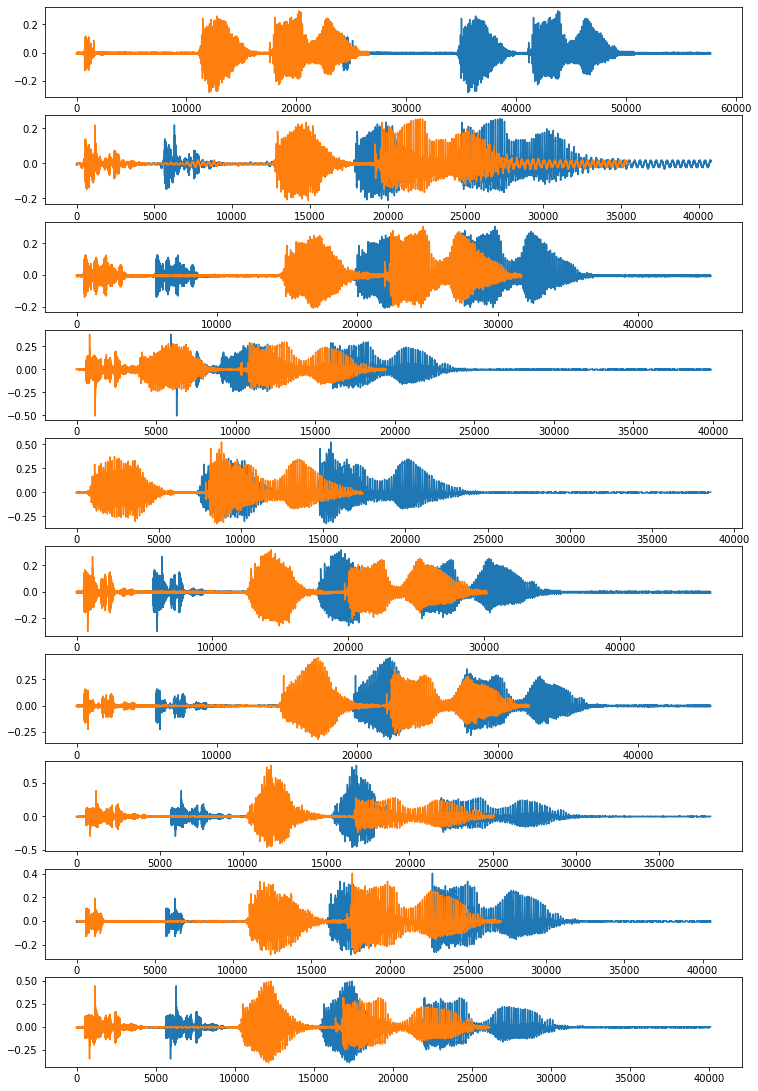

In [12]:
voices, sampling_rate = load_voices("./drive/MyDrive/Train")
draw_signals(voices, sampling_rate)
signals = remove_silence(voices)
draw_signals(signals, sampling_rate)
normal_signals = frame_and_normalize(signals)
matrix_features = feature_extraction(normal_signals)
mean, avg, matrix_distance = calcute_dtw(matrix_features)

In [13]:
print_results(matrix_distance)

         voice 1        voice 2        voice 3        voice 4        voice 5  \
0       0.000000  392593.045936  464393.580084  351792.794535  474107.914272   
1  392593.045936       0.000000  393469.859802  350536.566460  554326.456997   
2  464393.580084  393469.859802       0.000000  297050.801508  427057.747595   
3  351792.794535  350536.566460  297050.801508       0.000000  375300.560219   
4  474107.914272  554326.456997  427057.747595  375300.560219       0.000000   
5  372152.908373  312267.071085  294659.667303  189726.524763  440799.319202   
6  449047.387380  359297.627369  348502.447676  334896.319204  535988.022503   
7  389349.454572  373352.376519  251279.956234  185504.340490  371394.567838   
8  321451.497392  366198.854239  364245.744675  283008.770411  485571.775106   
9  391207.620225  347950.285343  264648.794162  175443.017744  391358.069602   

         voice 6        voice 7        voice 8        voice 9       voice 10  
0  372152.908373  449047.387380  389349.

# Other Voices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

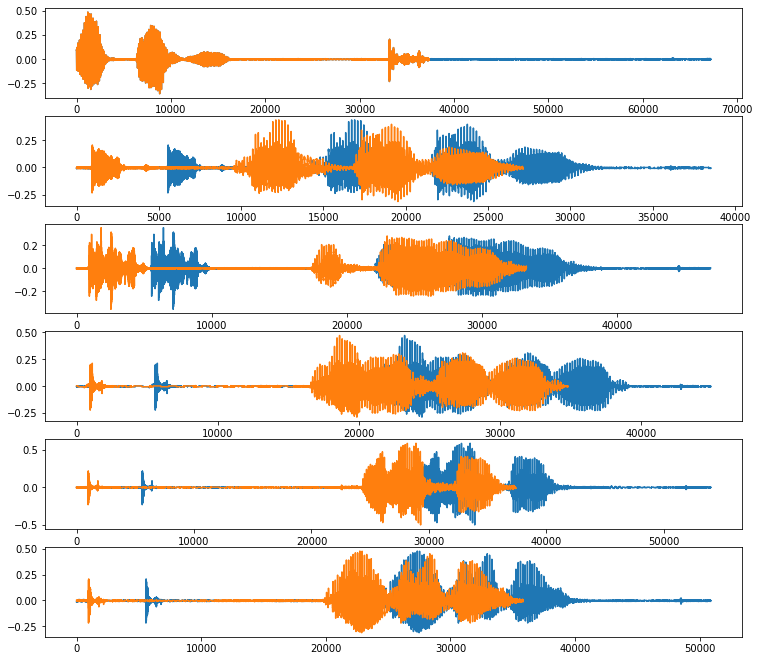

In [14]:
voices, sampling_rate = load_voices("./drive/MyDrive/Test")
draw_signals(voices, sampling_rate)
tests = remove_silence(voices)
draw_signals(tests, sampling_rate)
normal_tests = frame_and_normalize(tests)
matrix_features_test = feature_extraction(normal_tests)

In [17]:
verification(avg, mean, matrix_features, matrix_features_test)

Not Verified
Not Verified
Not Verified
Not Verified
Not Verified
Not Verified
